## Prosper Loan Data Investigation

#### By Chimene Chinah

### Investigation Overview

This aim of this project was to figure out the factors that influence the outcome of loans issued by Prosper.

### Dataset Overview

The prosper data set comprises of loan data of borrowers within a period of time. The dataset comprises of 81 columns and 113937 rows. The reason for this investigation is that we are trying to discover the factors that drive the loan outcome of a borrower.

In [15]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# load the loan data into a panda dataframe named 'loan'
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Data Wrangling

In [17]:
choice_columns =[
    "LoanStatus","Term", 'ProsperRating (Alpha)','ProsperRating (numeric)', 'ProsperScore','ListingCategory (numeric)', 'EmploymentStatus', 'BorrowerRate','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','IsBorrowerHomeowner','Occupation','IncomeRange'
]

choice_dataframe = loan[choice_columns]
choice_dataframe =choice_dataframe.dropna(subset=['ProsperRating (Alpha)']).reset_index()
choice_dataframe['LoanOriginationDate']= pd.to_datetime(choice_dataframe['LoanOriginationDate'])
choice_dataframe['TotalProsperLoans'] =choice_dataframe['TotalProsperLoans'].fillna(0)
choice_dataframe.drop(choice_dataframe.index[choice_dataframe['ProsperScore']==11], inplace =True)
choice_dataframe.drop(choice_dataframe.index[choice_dataframe['ProsperScore']==12], inplace =True)

### OBSERVATIONS

### Employment Status

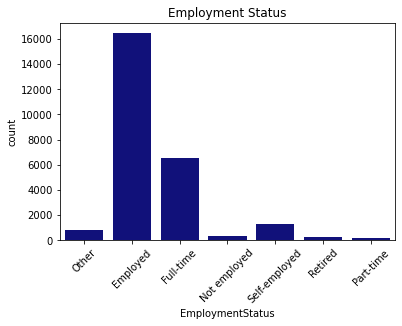

In [39]:
sns.countplot(data =choice_dataframe, x = 'EmploymentStatus', color = 'darkblue');
plt.title('Employment Status')
plt.xticks(rotation = 45);

#### Employment Status Observation
* Most borrowers are actually employed.
* Retired workers and part time workers are the least borrowers.
* Full time employers are the biggest sub-group.



###  Income Range of Borrowers.

Text(0.5, 1.0, 'Income Range of Borrowers')

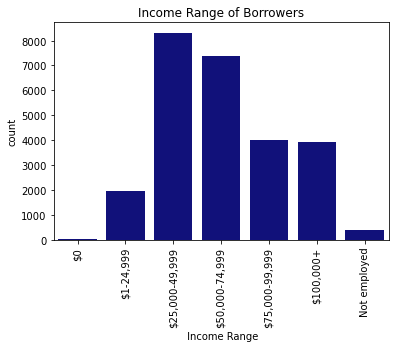

In [40]:
#arranging the values in IncomeRange column
income_range =['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed'] 
choice_dataframe['IncomeRange'] = pd.Categorical(choice_dataframe['IncomeRange'], categories = income_range)

#plotting the graph
sns.countplot(data =choice_dataframe, x = 'IncomeRange',color = 'darkblue');
plt.xticks(rotation = 90);
plt.xlabel(' Income Range');
plt.title('Income Range of Borrowers')



Observation:
* From the data, we can see that majority of borrowers fall within the income bracket of 50k to 74k USD, followed by 25k to 49.9k USD

## Do Borrowers Have Homes?

Text(0.5, 1.0, 'Do Borrowers Have Homes?')

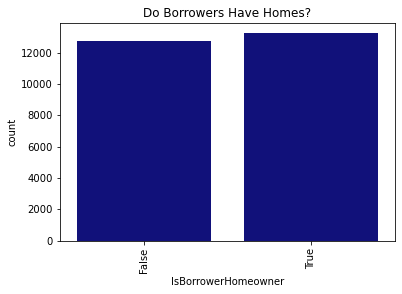

In [41]:
sns.countplot(data =choice_dataframe, x = 'IsBorrowerHomeowner',color = 'darkblue');
plt.xticks(rotation = 90);
plt.title('Do Borrowers Have Homes?')

Observation:
* From the data above, we can see that over 40,000 borrowers have homes

### Monthly Income of Borrowers

Text(0.5, 1.0, 'Monthly Income of Borrowers')

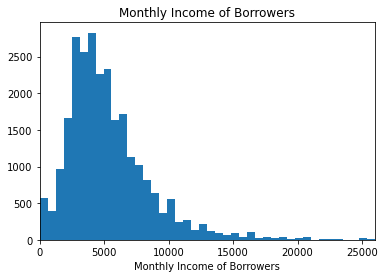

In [42]:
income_mean = choice_dataframe['StatedMonthlyIncome'].mean()
income_std  = choice_dataframe['StatedMonthlyIncome'].std()
boundary =income_mean + income_std *3
plt.hist(data= choice_dataframe, x ='StatedMonthlyIncome', bins =1000);
plt.xlim(0, boundary)
plt.xlabel('Monthly Income of Borrowers');
plt.title('Monthly Income of Borrowers')

Observation: 
* From this, we can see that the monthly income is skewed to the right, with the mode of the data around 5000

## Loan Amount of Borrowers

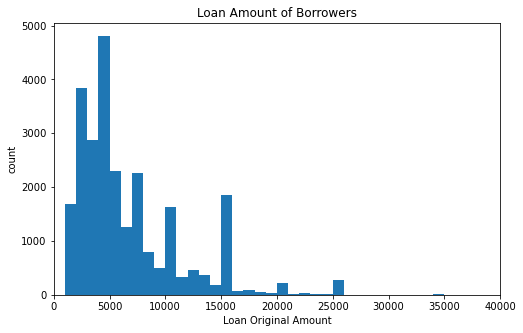

In [45]:
# Plotting the loan amount of borrowers
binsize = 1000

bins = np.arange(0, choice_dataframe['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = choice_dataframe, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,40000])
plt.xlabel('Loan Original Amount')
plt.ylabel('count')
plt.title('Loan Amount of Borrowers')
plt.show();


Observation: 
* From the graph, it can be seen that a huge chunk of the loans issued by Prosper fall below $20k.

### Prosper Score of Borrowers

Text(0.5, 1.0, 'Prosper Score of Borrowers')

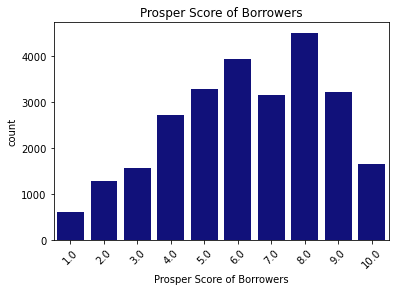

In [46]:
sns.countplot(data =choice_dataframe, x = 'ProsperScore', color = 'darkblue');
plt.xticks(rotation = 45);
plt.xlabel('Prosper Score of Borrowers');
plt.title('Prosper Score of Borrowers')

Observation:

* Most of the prosper score of borrowers fall witbin 4 to 8

In [24]:
# Transform the state of the data so that it will be easier to visualize
state = (choice_dataframe['LoanStatus'] == 'Completed') | (choice_dataframe['LoanStatus'] == 'Defaulted') |\
                  (choice_dataframe['LoanStatus'] == 'Chargedoff')
choice_dataframe = choice_dataframe[state]

def change_to_default(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
choice_dataframe['LoanStatus'] = choice_dataframe.apply(change_to_default, axis=1)
choice_dataframe['LoanStatus'].value_counts()

Completed    19633
Defaulted     6340
Name: LoanStatus, dtype: int64

## Representation of Prosper Rating Based on Loan Status

Text(0.5, 1.0, 'Representation of Prosper Rating Based on Loan Status')

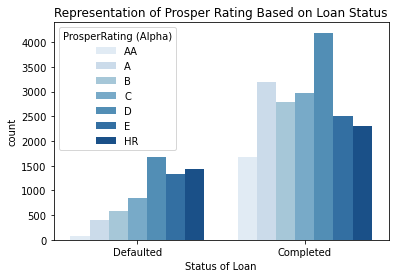

In [47]:
#arranging the values in ProsperRating (Alpha) column
rating =['AA', 'A', 'B', 'C', 'D', 'E', 'HR'] 
choice_dataframe['ProsperRating (Alpha)'] = pd.Categorical(choice_dataframe['ProsperRating (Alpha)'], categories = rating)

sns.countplot(data = choice_dataframe, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.xlabel('Status of Loan')
plt.title('Representation of Prosper Rating Based on Loan Status')

Observation:

* D rating had the highest number of completed loans and also defaulted loans.

* AA rating had the lowest number of defaulted loans also completed loans

### How Borrowers Responded to their Loan Obligation based on their Prosper Score

Text(0.5, 1.0, 'How Borrowers Responded to their Loan Obligation based on their Prosper Score')

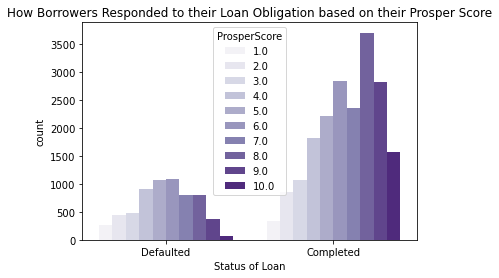

In [48]:
sns.countplot(data = choice_dataframe, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Purples')
plt.xlabel('Status of Loan')
plt.title('How Borrowers Responded to their Loan Obligation based on their Prosper Score')

Observation:

* Borrowers with a personal rating score of 8 had the highest completed rate while borrowers with rating 1 had the least completed rate.

* Also, borrowers with a personal rating of 10 had the least default rate while borrowers with a personal rating of 6 had the highest default rate.

In [27]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_cat(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
choice_dataframe['ListingCategory (numeric)'] = choice_dataframe.apply(reduce_cat, axis=1)
choice_dataframe['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12720
Other                  7078
Home Improvement       2609
Business               2364
Auto                   1202
Name: ListingCategory (numeric), dtype: int64

### Categories of Loans Issued

Text(0.5, 1.0, 'Categories of Loans Issued')

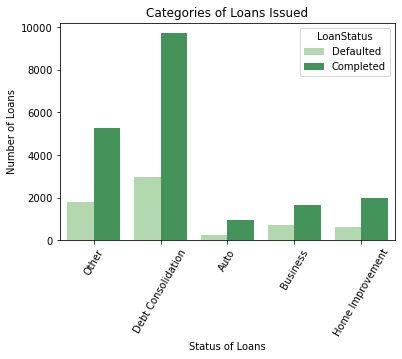

In [49]:
sns.countplot(data = choice_dataframe, x = 'ListingCategory (numeric)', hue = 'LoanStatus', palette = 'Greens');
plt.xticks(rotation =60);
plt.xlabel('Status of Loans');
plt.ylabel('Number of Loans');
plt.title('Categories of Loans Issued')

 ## Status of Loan Based on Amount of Loan Obtained

Text(0.5, 1.0, 'Status of Loan Based on Amount of Loan Obtained')

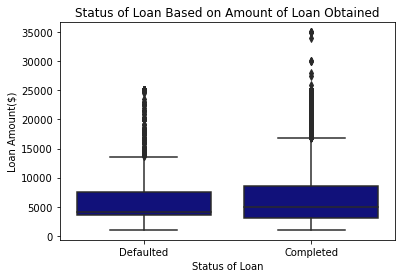

In [50]:
sns.boxplot(data = choice_dataframe, x = 'LoanStatus', y = 'LoanOriginalAmount', color = 'darkblue');
plt.xlabel('Status of Loan');
plt.ylabel('Loan Amount($)');
plt.title('Status of Loan Based on Amount of Loan Obtained')

Observation: 
* From this graph, it can be seen that the bulk of the loan is between 3k USD and 7k USD. 
* Also, loans within this range had the highest completion rate and default rate as compared to other ranges

### Relationship Between ProsperScore and Employment Status

Text(0.5, 1.0, 'Relationship Between ProsperScore and Employment Status')

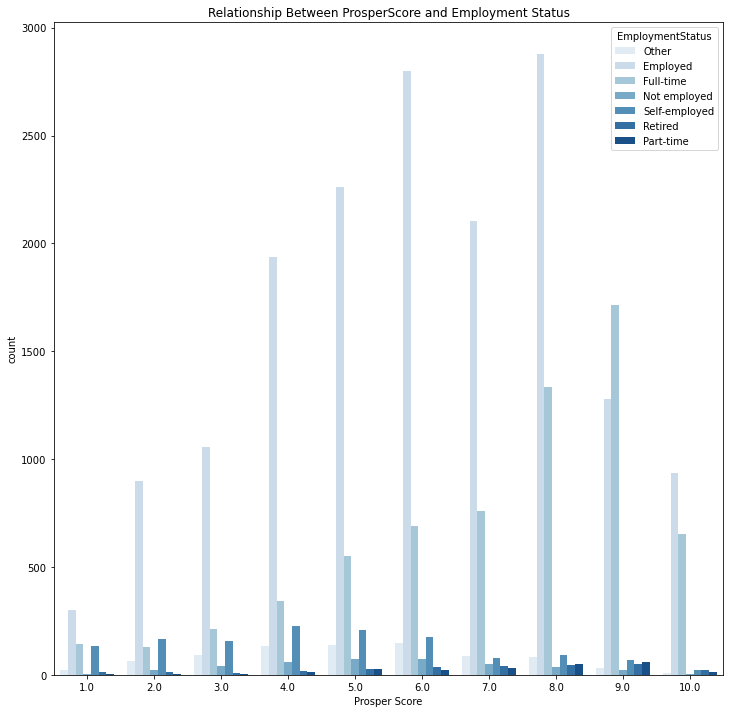

In [53]:
plt.figure(figsize = [12, 12])
sns.countplot(data = choice_dataframe, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues');
plt.xlabel('Prosper Score');
plt.title('Relationship Between ProsperScore and Employment Status')

Observation:
* From the graph, it can be seen that borrowers with prosper score of 8 had the highest employment rate while borrowers with a prosper score of 1 had the least employment rate.

### Plot Showing the Relationship between ProsperScore, Status and also Loan Category

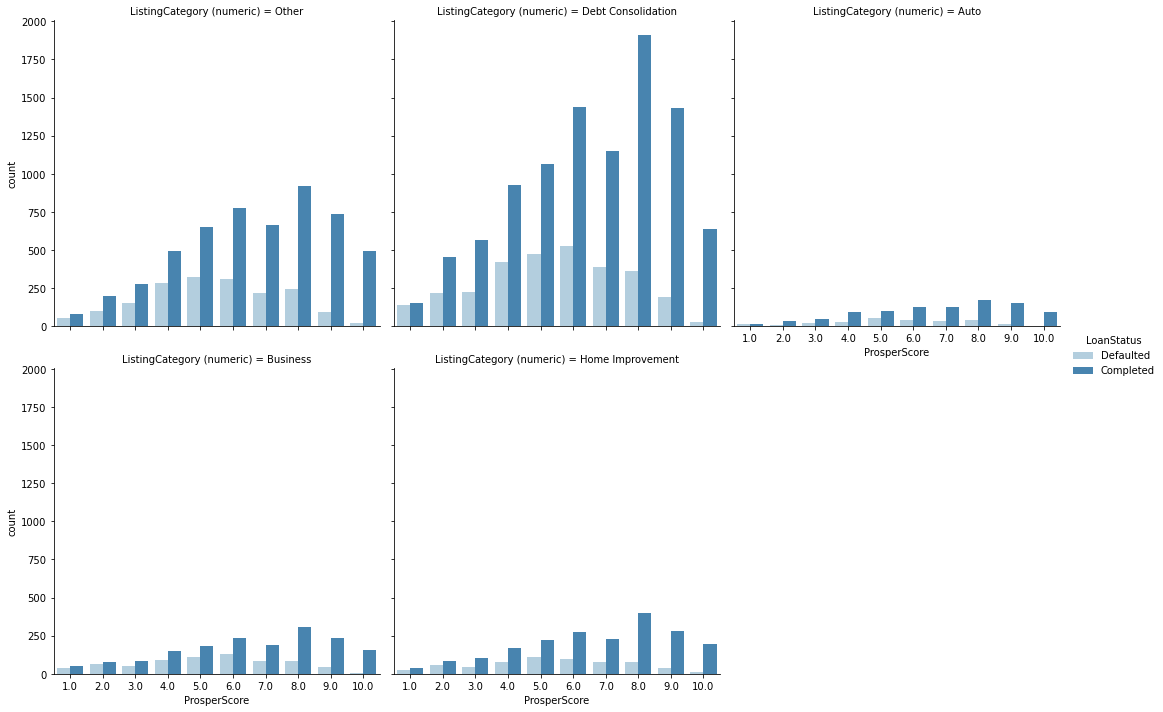

In [56]:
sns.catplot(x = 'ProsperScore', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = choice_dataframe, kind = 'count', palette = 'Blues', col_wrap = 3);


Observation
* From the graph, the bulk of the loans came from Debt Consolidation and Other categories.

* Borrowers with a prosper score rating of 8 tend to have had access to the most number of loans.

* Borrowers with a prosper score of 6 tend to have had the highest number of defaults.

* Borrowers with a prosper score rating of 1 tend to have accest the least number of loan facilities.

## Plot Showing the Relationship between Loan Amount, Status and also Loan Category

Text(0.5, 1.0, 'Plot Showing the Relationship between Loan Amount, Status and also Loan Category')

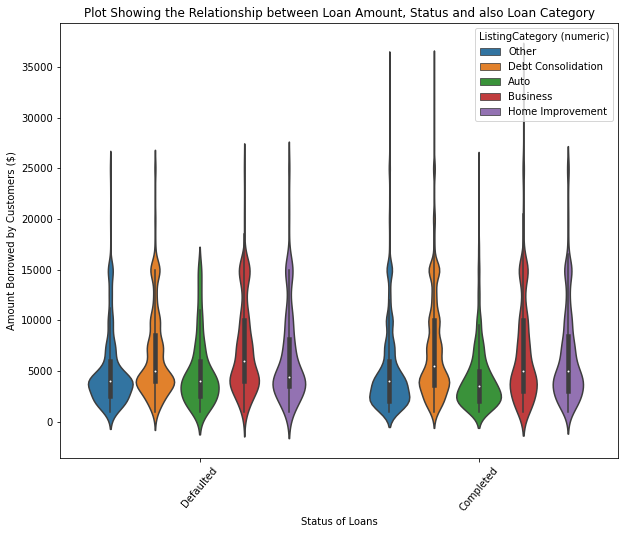

In [57]:
plt.figure(figsize = [10, 8])
sns.violinplot(data=choice_dataframe, x='LoanStatus', y='LoanOriginalAmount', hue='ListingCategory (numeric)');
plt.xticks(rotation =50);
plt.xlabel('Status of Loans');
plt.ylabel('Amount Borrowed by Customers ($)');
plt.title('Plot Showing the Relationship between Loan Amount, Status and also Loan Category')

Observation

* Auto Loan facilities tend to have the lowest deafault rate.

* Business and home improvement loan facilities tend to have almost thesame completion rate, with the bulk of the loan amount ranging around $5k.

## Plot Showing the Relationship between Loan Amount, Status and also Employment Status

Text(0.5, 1.0, 'Plot Showing the Relationship between Loan Amount, Status and also Employment Status')

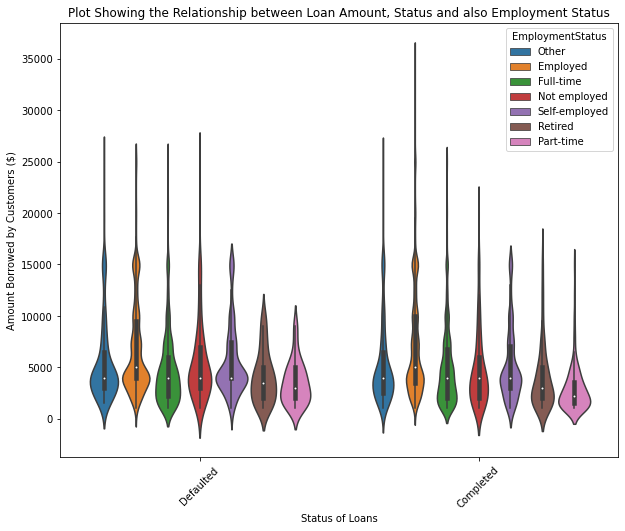

In [58]:
plt.figure(figsize = [10, 8])
sns.violinplot(data=choice_dataframe, x='LoanStatus', y='LoanOriginalAmount', hue='EmploymentStatus');
plt.xticks(rotation =45);
plt.xlabel('Status of Loans');
plt.ylabel('Amount Borrowed by Customers ($)');
plt.title('Plot Showing the Relationship between Loan Amount, Status and also Employment Status')

### Observation

* Employed borrowers accessed the highest amount of loan (up to 36K USD).  They also had the highest number of completed rate.
* Most of the loans (both defaulted and completed) ranged around 3k 10k USD.
* Not employed had the highest defaulted rate.
* Borrowers that fall within these employment category: Self-employed, Retired and Part-time had access to the lowest loan amount range (0 to 10k USD for the majority of loans, with few slighly above 15K USD). What we do not know is if this was because they were being conservative or Prosper saw them as high risk loans and limited their loan accessibility.

### Plot Showing the Relationship between Term of Loan, Loan Status and also Employment Status

Text(0.5, 1.0, 'Plot Showing the Relationship between Term of Loan, Loan Status and also Employment Status')

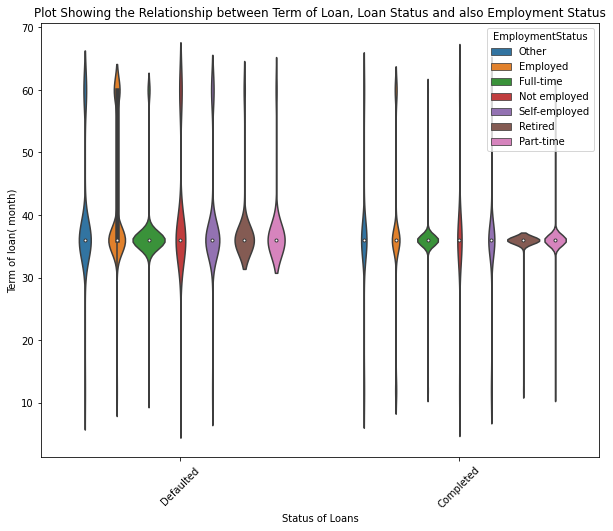

In [59]:
plt.figure(figsize = [10, 8])
sns.violinplot(data=choice_dataframe, x='LoanStatus', y='Term', hue='EmploymentStatus');
plt.xticks(rotation =45);
plt.xlabel('Status of Loans');
plt.ylabel('Term of loan( month)');
plt.title('Plot Showing the Relationship between Term of Loan, Loan Status and also Employment Status')

### Observation

* Most of the loans had a term ranging around 30 to 40 months.
* Retired borrowers that completed their loans did not have loan terms above 36 months. This could be a risk aversion protocol set up by Prosper or pensioners do not fancy longer term loans.
* Retired borrowers that defaulted in their loans had terms above 30 months. 
* Part-Time borrowers that defaulted all had access to loans with terms above 30 months.

## Plot Showing the Relationship between Prosper Score, Loan Status and also Employment Status

Text(0.5, 1.0, 'Plot Showing the Relationship between Prosper Score, Loan Status and also Employment Status')

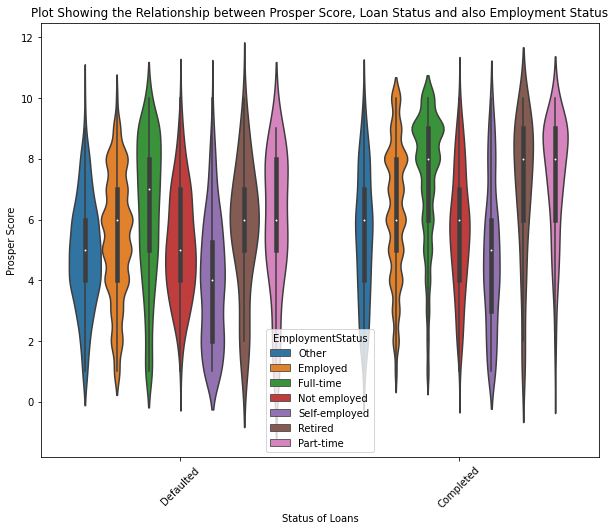

In [60]:
plt.figure(figsize = [10, 8])
sns.violinplot(data=choice_dataframe, x='LoanStatus', y='ProsperScore', hue='EmploymentStatus');
plt.xticks(rotation =45);
plt.xlabel('Status of Loans');
plt.ylabel('Prosper Score');
plt.title('Plot Showing the Relationship between Prosper Score, Loan Status and also Employment Status')

### Observations
* Most of the defualters in the self-employed category had prosper scores below 6.
* most of the borrowers in the full-time category  that repaid their loans had prosper scores ranging from 7 to 10.
* Also, most of the borrowers that completed their loans had prosper scores ranging from 2 to 6.

### Plot Showing the Relationship between Prosper Score, Loan Status and also Income Range of Borrowers.

Text(0.5, 1.0, 'Plot Showing the Relationship between Prosper Score, Loan Status and also Income Range of Borrowers')

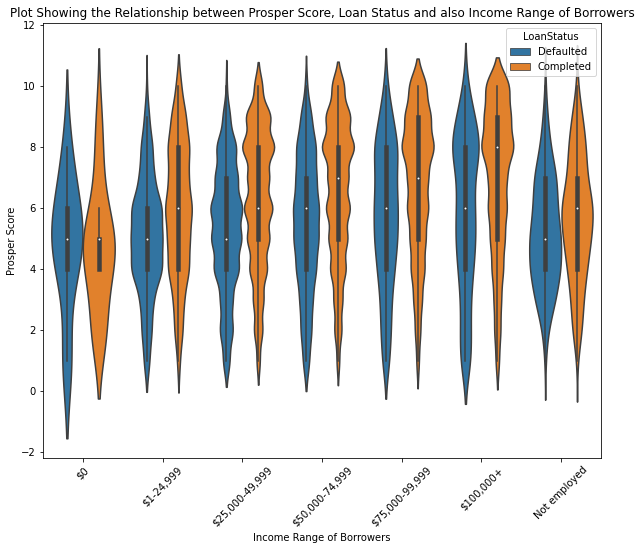

In [61]:
plt.figure(figsize = [10, 8])
sns.violinplot(data=choice_dataframe, x='IncomeRange', y='ProsperScore', hue='LoanStatus');
plt.xticks(rotation =45);
plt.xlabel('Income Range of Borrowers');
plt.ylabel('Prosper Score');
plt.title('Plot Showing the Relationship between Prosper Score, Loan Status and also Income Range of Borrowers')

## Observation
* Most of the borrowers with income brackets of 50k - 74k USD, 75k to 99k USD and above 100k USD that completed their loans  had prosper scores ranging from 7 to 10.
* Most of the defaulters across the income brackets had prosper scores that ranges around 2 to 7.

### Plot Showing the Relationship between Loan Amount, Loan Status and also Income Range of Borrowers.

Text(0.5, 1.0, 'Plot Showing the Relationship between Loan Amount, Loan Status and also Income Range of Borrowers')

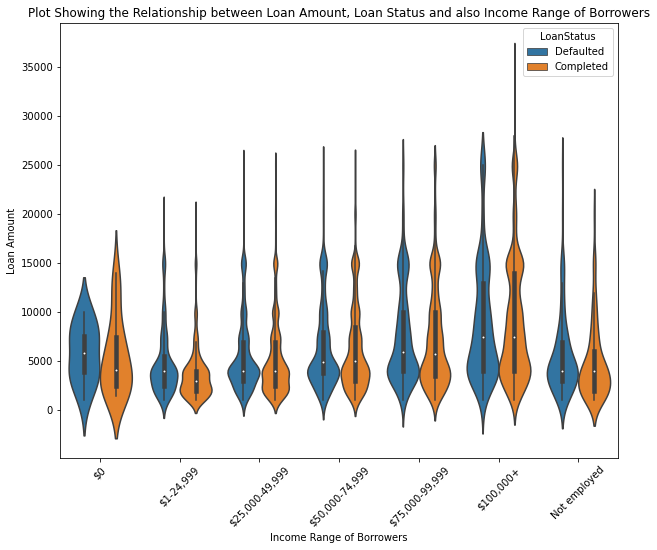

In [62]:
plt.figure(figsize = [10, 8])
sns.violinplot(data=choice_dataframe, x='IncomeRange', y='LoanOriginalAmount', hue='LoanStatus');
plt.xticks(rotation =45);
plt.xlabel('Income Range of Borrowers');
plt.ylabel('Loan Amount');
plt.title('Plot Showing the Relationship between Loan Amount, Loan Status and also Income Range of Borrowers')

## Observations

* For borrowers that did not disclose their income range, ranged between 1k to 15k USD.
* Borrowers with income above 100k had access to loans up to 35k USD.
* Surprisingly, borrowers that filed not-employed had access to loan up to 25k USD. However, the bulk of their loans ranged arou nd 1k to 15k USD.
* Default rate and Completion rate of borrowers for all the income brackets were almost identical. 

In [12]:
!jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

^C
